In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train_helper = pd.read_csv('train_helper.csv')
test = pd.read_csv('test.csv')
test_helper = pd.read_csv('test_helper.csv')

In [3]:
train = train.iloc[:20000,:]
test = test.iloc[:,:]
train_helper = train_helper.iloc[:2000000,:]
test_helper = test_helper.iloc[:,:]

In [4]:
train_helper = train_helper.drop(columns = ['V3','V14','V15','V16'])
test_helper = test_helper.drop(columns = ['V3','V14','V15','V16'])
train = train.drop(columns = ['V11'])
test = test.drop(columns = ['V11'])

In [5]:
subset_check = test['V1'].isin(test_helper['V1']).all()
not_in_set = test[~test['V1'].isin(test_helper['V1'])]
print(subset_check)
count = len(not_in_set)
print(count)

False
73


In [6]:
train_helper.isnull().sum()

V1          0
V17         0
V18         0
V19         0
V20    376387
V21    996688
dtype: int64

In [7]:
subset_check = train['V1'].isin(train_helper['V1']).all()
not_in_set = train[~train['V1'].isin(train_helper['V1'])]
print(subset_check)
count = len(not_in_set)
print(count)

False
13


In [8]:
# # Define chunk size
# chunksize = 100000

# # Initialize empty dataframe
# merged_df = pd.DataFrame()

# # Iterate through the CSV files in chunks
# for chunk1 in pd.read_csv('train_helper.csv', chunksize=chunksize):
    
#     # iterate over chunks of the second dataframe
#     for chunk2 in pd.read_csv('train.csv', chunksize=chunksize):
        
#         # merge the two chunks on the common column 'V1'
#         merged_chunk = pd.merge(chunk1, chunk2, on='V1', how='outer')
        
#         # append the merged results to the main dataframe
#         merged_df = pd.concat([merged_df, merged_chunk], axis=0)

In [9]:
# import dask.dataframe as dd

# train_helper = dd.read_csv('train_helper.csv')
# train = dd.read_csv('train.csv')

# train_merged = dd.merge(train_helper, train, on='V1', how='outer')

In [10]:
# train_merged.to_csv('train_merged.csv', index=False)

In [11]:
# train_merged = pd.read_csv('train_merged.csv')

In [12]:
train_merged = pd.merge(train, train_helper, on='V1', how='outer')

In [13]:
train_merged.isnull().sum()

V1               0
V2          939049
V3          939049
V4          939049
V5          939049
V6          939049
V7          939049
V8          939049
V9          939049
V10         939049
V12         939049
Target      939049
V13        1453612
V17             13
V18             13
V19             13
V20        7175558
V21       12279654
dtype: int64

In [14]:
# train_merged1 = pd.merge(train_helper, train, on='V1')

In [15]:
train_merged.dropna(subset=['Target'], inplace=True)

In [16]:
train_merged.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V12              0
Target           0
V13         514563
V17             13
V18             13
V19             13
V20        6887760
V21       11523307
dtype: int64

In [17]:
train_merged

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,Target,V13,V17,V18,V19,V20,V21
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.39.130,875.0,417293.0,68.15,NaN
1,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.39.130,875.0,417293.0,68.15,NaN
2,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,97.187.152.62,875.0,488497.0,82.25,NaN
3,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.37.157,875.0,417293.0,82.25,NaN
4,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.37.157,875.0,417293.0,94.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15380148,CUID5209,TID35995,EID654616,43.42000,2020-05-31 17:06:51,33227.0,A,BA302425,BB113702,PD142403,CP14985,0.0,2018-07-09 00:00:00,125.195.0.69,875.0,2136427.0,35.25,NaN
15380149,CUID5209,TID35995,EID654616,43.42000,2020-05-31 17:06:51,33227.0,A,BA302425,BB113702,PD142403,CP14985,0.0,2018-07-09 00:00:00,125.195.0.69,875.0,2136427.0,35.25,NaN
15380150,CUID5209,TID35995,EID654616,43.42000,2020-05-31 17:06:51,33227.0,A,BA302425,BB113702,PD142403,CP14985,0.0,2018-07-09 00:00:00,125.195.0.69,875.0,2136427.0,NaN,97.94
15380151,CUID5209,TID35995,EID654616,43.42000,2020-05-31 17:06:51,33227.0,A,BA302425,BB113702,PD142403,CP14985,0.0,2018-07-09 00:00:00,125.195.0.69,875.0,2136427.0,NaN,97.11


In [18]:
# import pandas as pd

# # create df1 and df2
# df1 = pd.DataFrame({
#     'V1': [1, 2, 3, 4, 5],
#     'V2': ['A', 'B', 'C', 'A', 'B'],
# })
# df2 = pd.DataFrame({
#     'V1': [3, 4, 5, 6, 7],
#     'V3': [101, 102, 103, 104, 105],
# })

# # merge df1 and df2 on V1 column with outer join
# merged_df = pd.merge(df1, df2, on='V1', how='outer')

# # display the merged dataframe
# print(df1)
# print(df2)
# print(merged_df)

In [19]:
test_helper

,V1,V17,V18,V19,V20,V21
0,CUID3258,168.160.152.82,875,498795,94.00,NaN
1,CUID2835,121.122.132.145,875,33514,129.25,NaN
2,CUID1750,183.207.164.149,875,2136427,98.70,NaN
3,CUID103,123.143.40.203,875,1730685,96.35,NaN
4,CUID1750,183.207.164.149,875,2136427,NaN,63.91
...,...,...,...,...,...,...
1160945,CUID993,129.46.123.166,875,1058753,30.55,NaN
1160946,CUID835,140.104.180.167,875,2136427,NaN,NaN
1160947,CUID835,140.104.180.167,875,2136427,NaN,NaN
1160948,CUID3739,116.109.64.138,875,33514,124.55,NaN


In [20]:
test_helper = test_helper.groupby('V1').agg(lambda x: x.value_counts().index[0] if len(x.unique()) > 1 else x.iloc[0]).reset_index().reset_index()

In [21]:
test_helper

,index,V1,V17,V18,V19,V20,V21
0,0,CUID1001,116.137.101.48,875,1777813,169.20,294.65
1,1,CUID1002,117.69.167.132,875,1777813,169.20,676.45
2,2,CUID1006,117.49.43.65,875,1777813,58.75,19.92
3,3,CUID101,121.130.49.202,875,33514,124.55,30.71
4,4,CUID1010,168.142.67.119,875,1058753,105.75,17.43
...,...,...,...,...,...,...,...
3657,3657,CUID992,66.160.120.162,875,14484,58.75,40.67
3658,3658,CUID993,125.165.125.120,875,1058753,23.50,9.13
3659,3659,CUID995,133.113.140.194,875,976830,169.20,39.01
3660,3660,CUID997,131.203.138.94,875,1058753,145.70,3.32


In [22]:
test_helper = test_helper.drop(columns ="index")

In [23]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V13
0,CUID6660,TID198043,EID908838,4154.12500,13-08-2020 08:41,33227,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00
1,CUID6660,TID312736,EID502971,8350.00000,17-08-2020 04:13,33227,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00
2,CUID6660,TID308818,EID231193,20.87500,11-08-2020 01:40,363981,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00
3,CUID6660,TID321252,EID1124129,20457.50000,30-08-2020 22:11,33227,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00
4,CUID6660,TID420788,EID908838,4154.12500,13-08-2020 08:40,33227,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
215847,CUID1447,TID282851,EID2057828,125.24165,01-07-2020 05:20,380044,A,BA11135,BB68920,PD57769,CP443935,23-05-2020 00:00
215848,CUID1447,TID250595,EID1438371,41.74165,09-05-2020 11:18,380044,A,BA11135,BB68920,PD14453,CP443935,30-04-2020 00:00
215849,CUID1447,TID401706,EID1645339,83.50000,13-07-2020 20:45,380044,A,BA376237,BB189059,PD13526,CP443935,14-07-2020 00:00
215850,CUID1447,TID312292,EID2054990,80.16000,15-08-2020 11:11,380044,A,BA377591,BB171054,PD35695,CP443935,02-09-2019 00:00


In [24]:
test_merged = pd.merge(test, test_helper, on='V1', how='outer')

In [25]:
test_merged

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V13,V17,V18,V19,V20,V21
0,CUID6660,TID198043,EID908838,4154.1250,13-08-2020 08:41,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
1,CUID6660,TID312736,EID502971,8350.0000,17-08-2020 04:13,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
2,CUID6660,TID308818,EID231193,20.8750,11-08-2020 01:40,363981.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
3,CUID6660,TID321252,EID1124129,20457.5000,30-08-2020 22:11,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
4,CUID6660,TID420788,EID908838,4154.1250,13-08-2020 08:40,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215849,CUID1447,TID401706,EID1645339,83.5000,13-07-2020 20:45,380044.0,A,BA376237,BB189059,PD13526,CP443935,14-07-2020 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215850,CUID1447,TID312292,EID2054990,80.1600,15-08-2020 11:11,380044.0,A,BA377591,BB171054,PD35695,CP443935,02-09-2019 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215851,CUID1447,TID190872,EID2058822,211.1715,02-08-2020 13:39,380044.0,A,BA377591,BB171054,PD58354,CP443935,02-09-2019 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215852,CUID6823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.79.140.87,875.0,1777813.0,112.80,81.34


In [26]:
test_merged.dropna(subset=['V5'], inplace=True)

In [27]:
test_merged

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V13,V17,V18,V19,V20,V21
0,CUID6660,TID198043,EID908838,4154.12500,13-08-2020 08:41,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
1,CUID6660,TID312736,EID502971,8350.00000,17-08-2020 04:13,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
2,CUID6660,TID308818,EID231193,20.87500,11-08-2020 01:40,363981.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
3,CUID6660,TID321252,EID1124129,20457.50000,30-08-2020 22:11,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
4,CUID6660,TID420788,EID908838,4154.12500,13-08-2020 08:40,33227.0,A,BA4811,BB68389,PD39402,CP0,11-08-2020 00:00,121.167.155.58,875.0,33514.0,141.00,163.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,CUID1447,TID282851,EID2057828,125.24165,01-07-2020 05:20,380044.0,A,BA11135,BB68920,PD57769,CP443935,23-05-2020 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215848,CUID1447,TID250595,EID1438371,41.74165,09-05-2020 11:18,380044.0,A,BA11135,BB68920,PD14453,CP443935,30-04-2020 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215849,CUID1447,TID401706,EID1645339,83.50000,13-07-2020 20:45,380044.0,A,BA376237,BB189059,PD13526,CP443935,14-07-2020 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215850,CUID1447,TID312292,EID2054990,80.16000,15-08-2020 11:11,380044.0,A,BA377591,BB171054,PD35695,CP443935,02-09-2019 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74


In [28]:
test_merged.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V12       0
V13    2761
V17      73
V18      73
V19      73
V20      84
V21     356
dtype: int64

In [29]:
test_merged.dtypes

V1      object
V2      object
V3      object
V4     float64
V5      object
V6     float64
V7      object
V8      object
V9      object
V10     object
V12     object
V13     object
V17     object
V18    float64
V19    float64
V20    float64
V21    float64
dtype: object

In [30]:
# test_merged['V13'].fillna(test_merged["V13"].mode()[0], inplace=True)
# test_merged['V17'].fillna(test_merged["V17"].mode()[0], inplace=True)
# test_merged["V18"].fillna(test_merged["V18"].mean(), inplace=True)
# test_merged["V19"].fillna(test_merged["V19"].mean(), inplace=True)
# test_merged["V20"].fillna(test_merged["V20"].mean(), inplace=True)
# test_merged["V21"].fillna(test_merged["V21"].mean(), inplace=True)

In [31]:
test_merged.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V12       0
V13    2761
V17      73
V18      73
V19      73
V20      84
V21     356
dtype: int64

In [32]:
df = pd.concat([train_merged, test_merged])

In [33]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,Target,V13,V17,V18,V19,V20,V21
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.39.130,875.0,417293.0,68.15,NaN
1,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.39.130,875.0,417293.0,68.15,NaN
2,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,97.187.152.62,875.0,488497.0,82.25,NaN
3,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.37.157,875.0,417293.0,82.25,NaN
4,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474.0,A,BA1,BB425559,PD44707,CP0,0.0,2020-03-21 00:00:00,127.52.37.157,875.0,417293.0,94.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,CUID1447,TID282851,EID2057828,125.24165,01-07-2020 05:20,380044.0,A,BA11135,BB68920,PD57769,CP443935,NaN,23-05-2020 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215848,CUID1447,TID250595,EID1438371,41.74165,09-05-2020 11:18,380044.0,A,BA11135,BB68920,PD14453,CP443935,NaN,30-04-2020 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215849,CUID1447,TID401706,EID1645339,83.50000,13-07-2020 20:45,380044.0,A,BA376237,BB189059,PD13526,CP443935,NaN,14-07-2020 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74
215850,CUID1447,TID312292,EID2054990,80.16000,15-08-2020 11:11,380044.0,A,BA377591,BB171054,PD35695,CP443935,NaN,02-09-2019 00:00,97.38.100.62,875.0,2377899.0,148.05,64.74


In [34]:
df['V13'].fillna(df["V13"].mode()[0], inplace=True)
df['V17'].fillna(df["V17"].mode()[0], inplace=True)
df["V18"].fillna(df["V18"].mean(), inplace=True)
df["V19"].fillna(df["V19"].mean(), inplace=True)
df["V20"].fillna(df["V20"].mean(), inplace=True)
df["V21"].fillna(df["V21"].mean(), inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encode categorical features
label_cols = ['V1', 'V2', 'V3', 'V5', 'V7', 'V8', 'V9', 'V10', 'V12','V13','V17']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical features
num_cols = ['V4', 'V6','V1', 'V2', 'V3', 'V5', 'V7', 'V8', 'V9', 'V10', 'V12','V13','V17','V18','V19','V20','V21']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# # Split into features and target
# X = df.drop(['Target'], axis=1)
# y = df['Target']

In [36]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,Target,V13,V17,V18,V19,V20,V21
0,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261127,0.148712,-1.107888,0.037023,3.012873e-15
1,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261127,0.148712,-1.107888,0.037023,3.012873e-15
2,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,1.484970,0.148712,-1.007978,0.400852,3.012873e-15
3,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261431,0.148712,-1.107888,0.400852,3.012873e-15
4,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261431,0.148712,-1.107888,0.704042,3.012873e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,-2.117458,-0.183800,0.270870,-0.045670,-11.332215,2.984851,-0.182054,-1.924245,1.560240,1.407554,1.666428,NaN,2.600112,1.516358,0.148712,1.643130,2.098716,-1.661110e+00
215848,-2.117458,-0.452675,-0.866892,-0.114111,-7.472868,2.984851,-0.182054,-1.924245,1.560240,-1.278763,1.666428,NaN,4.651351,1.516358,0.148712,1.643130,2.098716,-1.661110e+00
215849,-2.117458,0.822834,-0.488104,-0.079884,-5.204485,2.984851,-0.182054,0.580708,-1.431541,-1.398878,1.666428,NaN,-3.920491,1.516358,0.148712,1.643130,2.098716,-1.661110e+00
215850,-2.117458,0.063432,0.257725,-0.082621,-4.020163,2.984851,-0.182054,0.597106,-1.550626,0.462094,1.666428,NaN,-7.829518,1.516358,0.148712,1.643130,2.098716,-1.661110e+00


In [37]:
df.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V12            0
Target    215852
V13            0
V17            0
V18            0
V19            0
V20            0
V21            0
dtype: int64

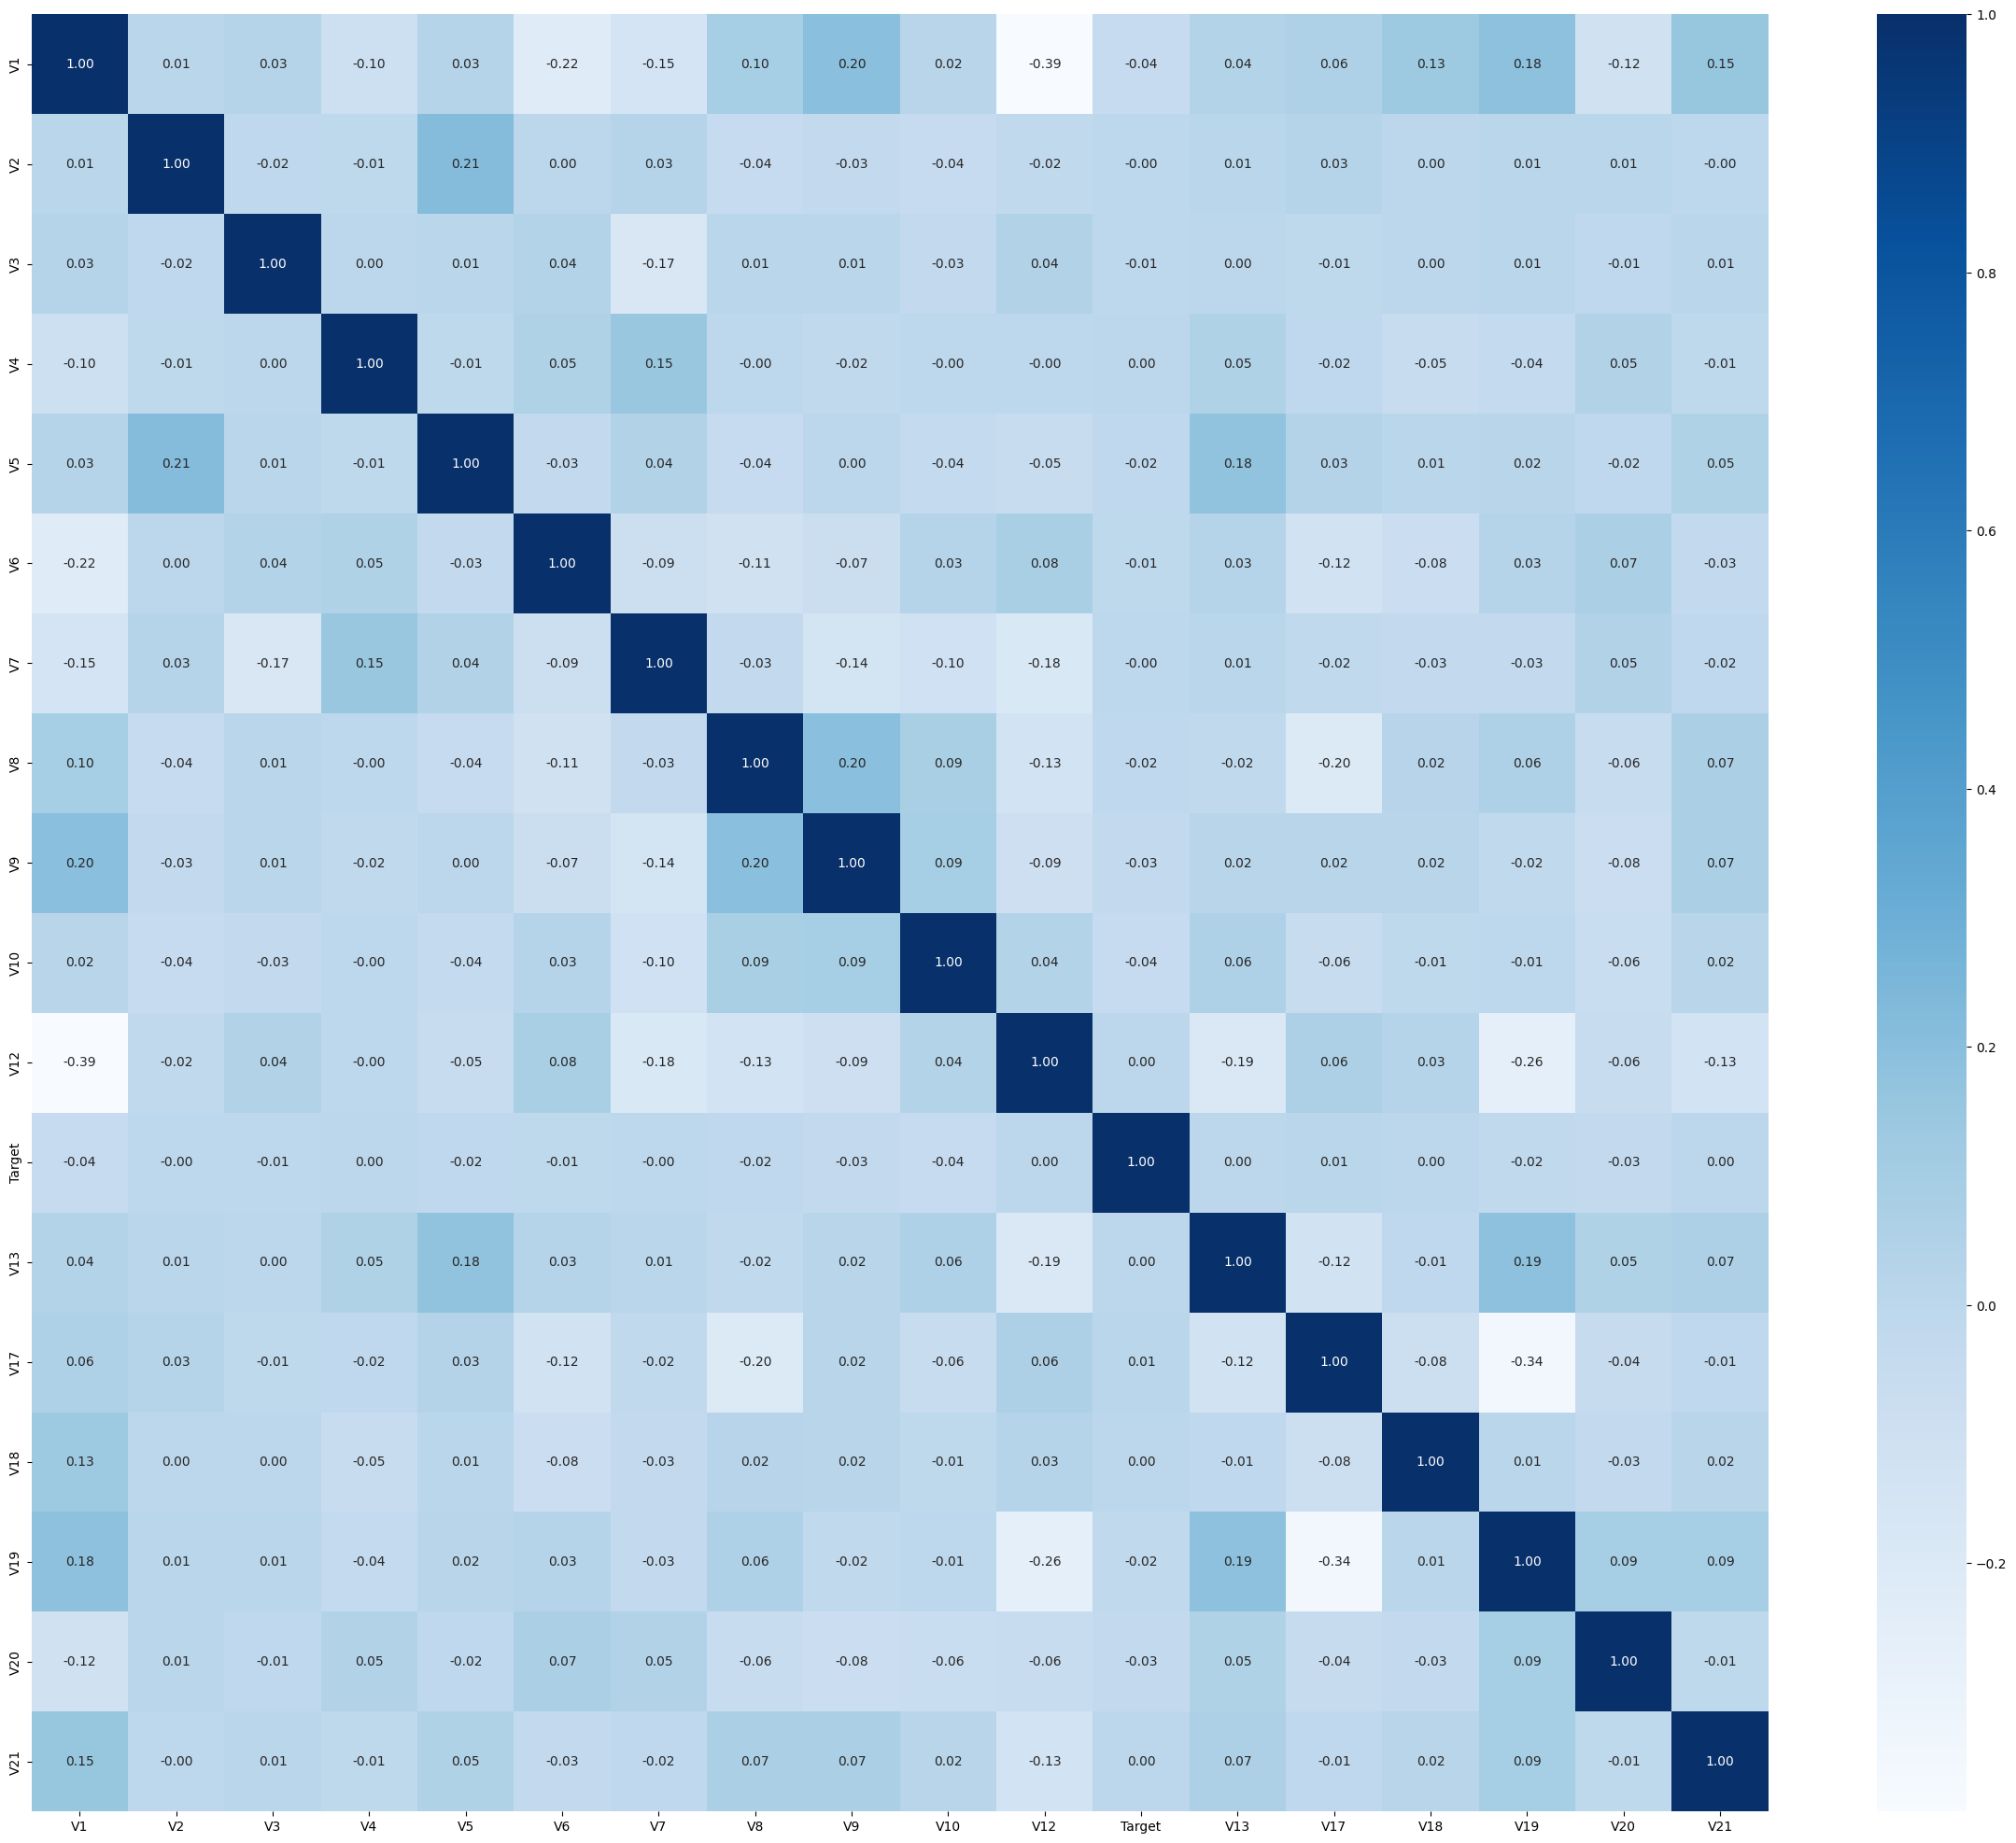

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(corr_matrix, cmap="Blues", annot=True, fmt=".2f")

# show the plot
plt.show()

In [39]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,Target,V13,V17,V18,V19,V20,V21
0,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261127,0.148712,-1.107888,0.037023,3.012873e-15
1,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261127,0.148712,-1.107888,0.037023,3.012873e-15
2,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,1.484970,0.148712,-1.007978,0.400852,3.012873e-15
3,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261431,0.148712,-1.107888,0.400852,3.012873e-15
4,-1.907711,-0.581388,0.291443,0.249778,-1.092817,2.951026,-0.182054,-2.025687,0.933543,1.283737,-1.076078,0.0,1.222614,-0.261431,0.148712,-1.107888,0.704042,3.012873e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,-2.117458,-0.183800,0.270870,-0.045670,-11.332215,2.984851,-0.182054,-1.924245,1.560240,1.407554,1.666428,NaN,2.600112,1.516358,0.148712,1.643130,2.098716,-1.661110e+00
215848,-2.117458,-0.452675,-0.866892,-0.114111,-7.472868,2.984851,-0.182054,-1.924245,1.560240,-1.278763,1.666428,NaN,4.651351,1.516358,0.148712,1.643130,2.098716,-1.661110e+00
215849,-2.117458,0.822834,-0.488104,-0.079884,-5.204485,2.984851,-0.182054,0.580708,-1.431541,-1.398878,1.666428,NaN,-3.920491,1.516358,0.148712,1.643130,2.098716,-1.661110e+00
215850,-2.117458,0.063432,0.257725,-0.082621,-4.020163,2.984851,-0.182054,0.597106,-1.550626,0.462094,1.666428,NaN,-7.829518,1.516358,0.148712,1.643130,2.098716,-1.661110e+00


In [40]:
df.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V12            0
Target    215852
V13            0
V17            0
V18            0
V19            0
V20            0
V21            0
dtype: int64

In [41]:
encoded_test = df.tail(215852)

In [42]:
encoded_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,Target,V13,V17,V18,V19,V20,V21
0,0.550910,-0.905291,1.578572,3.256633,-5.144352,-0.301205,-0.182054,1.339134,1.549596,0.849408,-1.076078,NaN,-4.964455,-0.605891,0.148712,-1.646386,1.916802,-0.165365
1,0.550910,0.067152,0.835685,6.695811,-2.859656,-0.301205,-0.182054,1.339134,1.549596,0.849408,-1.076078,NaN,-4.964455,-0.605891,0.148712,-1.646386,1.916802,-0.165365
2,0.550910,0.034146,0.350467,-0.131215,-6.221387,2.832656,-0.182054,1.339134,1.549596,0.849408,-1.076078,NaN,-4.964455,-0.605891,0.148712,-1.646386,1.916802,-0.165365
3,0.550910,0.140909,-1.436948,16.619808,6.057769,-0.301205,-0.182054,1.339134,1.549596,0.849408,-1.076078,NaN,-4.964455,-0.605891,0.148712,-1.646386,1.916802,-0.165365
4,0.550910,0.983585,1.578572,3.256633,-5.144471,-0.301205,-0.182054,1.339134,1.549596,0.849408,-1.076078,NaN,-4.964455,-0.605891,0.148712,-1.646386,1.916802,-0.165365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,-2.117458,-0.183800,0.270870,-0.045670,-11.332215,2.984851,-0.182054,-1.924245,1.560240,1.407554,1.666428,NaN,2.600112,1.516358,0.148712,1.643130,2.098716,-1.661110
215848,-2.117458,-0.452675,-0.866892,-0.114111,-7.472868,2.984851,-0.182054,-1.924245,1.560240,-1.278763,1.666428,NaN,4.651351,1.516358,0.148712,1.643130,2.098716,-1.661110
215849,-2.117458,0.822834,-0.488104,-0.079884,-5.204485,2.984851,-0.182054,0.580708,-1.431541,-1.398878,1.666428,NaN,-3.920491,1.516358,0.148712,1.643130,2.098716,-1.661110
215850,-2.117458,0.063432,0.257725,-0.082621,-4.020163,2.984851,-0.182054,0.597106,-1.550626,0.462094,1.666428,NaN,-7.829518,1.516358,0.148712,1.643130,2.098716,-1.661110


In [43]:
encoded_train = df.iloc[:15380153]

In [44]:
encoded_train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V12       0
Target    0
V13       0
V17       0
V18       0
V19       0
V20       0
V21       0
dtype: int64

In [45]:
encoded_test.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V12            0
Target    215852
V13            0
V17            0
V18            0
V19            0
V20            0
V21            0
dtype: int64

In [52]:
X = encoded_train.drop(['Target'], axis=1)
y = encoded_train['Target']

In [53]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# assume X is your feature matrix and y is your target vector

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

# create an instance of the XGBClassifier class
xgb = XGBClassifier()

# train the classifier on the training set
xgb.fit(X_train, y_train)

# make predictions on the test set
y_pred = xgb.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate precision, recall, and AUC score
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)
auc_score = metrics.auc(recall, precision)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc_score)
score = max(0, 100*metrics.auc(precision, recall))
print("Score:", score)

Accuracy: 1.0
Precision: [0.00128888 1.         1.        ]
Recall: [1. 1. 0.]
AUC Score: 1.0
Score: 99.871112094835


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create a Random Forest Classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training set
rfc.fit(X_train, y_train)

# predict the target variable for the test set
y_pred = rfc.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# calculate precision, recall, and AUC score
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)
auc_score = metrics.auc(recall, precision)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc_score)
score = max(0, 100*metrics.auc(precision, recall))
print("Score:", score)

Accuracy: 1.0
Precision: [0.0013007021 1.           1.          ]
Recall: [1. 1. 0.]
AUC Score: 1.0
Score: 99.86992978939419


In [49]:
encoded_test = encoded_test.drop(columns=['Target'])

In [64]:
prob = xgb.predict_proba(encoded_test)
np.set_printoptions(precision=10, suppress=True)
# display the result
prob

array([[0.99999994  , 0.0000000627],
       [0.9999999   , 0.0000001424],
       [0.99999994  , 0.0000000828],
       ...,
       [0.9999998   , 0.0000001537],
       [0.9999999   , 0.0000001139],
       [0.99999994  , 0.0000000789]], dtype=float32)

In [65]:
T_pred = xgb.predict(encoded_test)
T_pred_df = pd.DataFrame(T_pred, columns=['Target'])
prob_df = pd.DataFrame(prob, columns=['Porbability','Pred'])

In [66]:
prob_df

,Porbability,Pred
0,1.000000,6.274538e-08
1,1.000000,1.424328e-07
2,1.000000,8.284555e-08
3,1.000000,1.675112e-08
4,1.000000,8.130765e-08
...,...,...
215847,0.998796,1.203714e-03
215848,0.999997,2.695791e-06
215849,1.000000,1.536849e-07
215850,1.000000,1.138925e-07


In [67]:
T_pred_df["Target"].value_counts()

Target
0    215799
1        53
Name: count, dtype: int64

In [68]:
T_pred_df

,Target
0,0
1,0
2,0
3,0
4,0
...,...
215847,0
215848,0
215849,0
215850,0


In [69]:
result = pd.concat([test["V2"],prob_df, T_pred_df], axis=1)

In [70]:
result = result.drop(columns=['Pred'])

In [71]:
result

,V2,Porbability,Target
0,TID198043,1.000000,0
1,TID312736,1.000000,0
2,TID308818,1.000000,0
3,TID321252,1.000000,0
4,TID420788,1.000000,0
...,...,...,...
215847,TID282851,0.998796,0
215848,TID250595,0.999997,0
215849,TID401706,1.000000,0
215850,TID312292,1.000000,0


In [73]:
result.to_csv('Results2.csv',index = False)